In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('stage_1_train.csv')
num_labels = len(data)
num_positive = 0
num_negative = 0

base_dir = '/Users/TheBestKid/Desktop/Brain_Hemorrhaging'

for i in data['Label']:
    if int(i) == 1:
        num_positive = num_positive + 1
    elif int(i) == 0:
        num_negative = num_negative + 1
    else:
        print(str(i) + 'neither')

In [2]:
print('Total: ' + str(num_labels))
print('Positive: ' + str(num_positive))
print('Negative: ' + str(num_negative))

Total: 4045572
Positive: 230812
Negative: 3814760


In [3]:
sub_types = ['epidural', 'intraparenchymal', 'intraventricular', 'subarachnoid', 'subdural', 'any']

In [4]:
sub_pos_neg = []
for i in sub_types:
    sub_pos_neg.extend([i + '_positive', i + '_negative'])
sub_pos_neg_counts = dict(zip(sub_pos_neg, [0,0,0,0,0,0,0,0,0,0,0,0]))

In [5]:
all_ids = []
for i in range(len(data['ID'])):
    if i % 6 == 0:
        all_ids.append(str(data.iloc[i, 0])[3:12])

len(all_ids)
            

674262

In [6]:
total_neg = 0
total_pos = 0


for i in range(len(data['ID'])):
    if i % 6 == 0:
        if int(data.iloc[i, 1]) == 1:
            sub_pos_neg_counts['epidural_positive'] += 1
            total_pos += 1
        else:
            sub_pos_neg_counts['epidural_negative'] += 1
            total_neg += 1
    elif i % 6 == 1:
        if int(data.iloc[i, 1]) == 1:
            sub_pos_neg_counts['intraparenchymal_positive'] += 1
            total_pos += 1
        else:
            sub_pos_neg_counts['intraparenchymal_negative'] += 1
            total_neg += 1
    elif i % 6 == 2:
        if int(data.iloc[i, 1]) == 1:
            sub_pos_neg_counts['intraventricular_positive'] += 1
            total_pos += 1
        else:
            sub_pos_neg_counts['intraventricular_negative'] += 1
            total_neg += 1
    elif i % 6 == 3:
        if int(data.iloc[i, 1]) == 1:
            sub_pos_neg_counts['subarachnoid_positive'] += 1
            total_pos += 1
        else:
            sub_pos_neg_counts['subarachnoid_negative'] += 1
            total_neg += 1
    elif i % 6 == 4:
        if int(data.iloc[i, 1]) == 1:
            sub_pos_neg_counts['subdural_positive'] += 1
            total_pos += 1
        else:
            sub_pos_neg_counts['subdural_negative'] += 1
            total_neg += 1
    elif i % 6 == 5:
        if int(data.iloc[i, 1]) == 1:
            sub_pos_neg_counts['any_positive'] += 1
            total_pos +=1
        else:
            sub_pos_neg_counts['any_negative'] += 1
            total_neg += 1
    else:
        print('mistake')



In [7]:
sub_pos_neg_counts

{'epidural_positive': 2761,
 'epidural_negative': 671501,
 'intraparenchymal_positive': 32564,
 'intraparenchymal_negative': 641698,
 'intraventricular_positive': 23766,
 'intraventricular_negative': 650496,
 'subarachnoid_positive': 32122,
 'subarachnoid_negative': 642140,
 'subdural_positive': 42496,
 'subdural_negative': 631766,
 'any_positive': 97103,
 'any_negative': 577159}

In [8]:
total_neg = 0
for i in range(len(sub_pos_neg_counts.values())-2):
    if i % 2 == 1:
        total_neg += list(sub_pos_neg_counts.values())[i]
total_neg

3237601

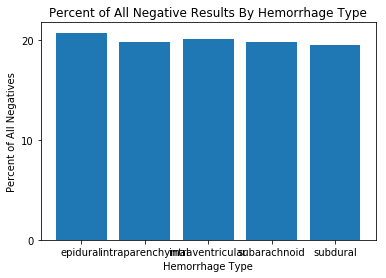

In [9]:
pos = []
neg = []

for i, k in sub_pos_neg_counts.items():
    if i[-8:] == 'positive':
        pos.append((k / sub_pos_neg_counts['any_positive'])*100)
    else:
        neg.append((k / total_neg)*100)



negative = plt.bar(np.arange(5), neg[:5])

plt.ylabel('Percent of All Negatives')
plt.xlabel('Hemorrhage Type')
plt.title('Percent of All Negative Results By Hemorrhage Type')
plt.xticks(np.arange(5), sub_types[:5])
plt.yticks(np.arange(0, 30, 10))
plt.figure(figsize=(10,10))

plt.show()

[2.8433725013645303, 33.53552413416681, 24.475041965747714, 33.08033737371657, 43.7638383984017]


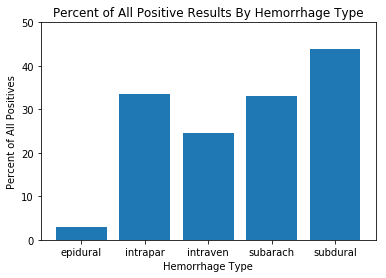

In [10]:
positive = plt.bar(np.arange(5), pos[:5])
print(pos[:5])

plt.ylabel('Percent of All Positives')
plt.xlabel('Hemorrhage Type')
plt.title('Percent of All Positive Results By Hemorrhage Type')
plt.xticks(np.arange(5), (x[:8] for x in sub_types[:5]))
plt.yticks(np.arange(0, 60, 10))
plt.figure(figsize=(20, 20))

plt.show()

In [11]:
print(list(sub_pos_neg_counts.keys())[1][-8:])

negative


In [12]:
#from See like a radiologist with systematic windowing
import pydicom as dcm
def window_image(img, window_center, window_width, intercept, slope):
    img = (img*slope + intercept)
    img_min = window_center - window_width // 2
    img_max = window_center + window_width // 2
    img[img<img_min] = img_min
    img[img>img_max] = img_max
    
    img = (img - img_min) / (img_max - img_min)
    return img

def get_windowing(data):
    dicom_fields = [data[('0028', '1050')].value, data[('0028', '1051')].value, 
                    data[('0028', '1052')].value, data[('0028', '1053')].value]
    int_fields = []
    for x in dicom_fields:
        if type(x) == dcm.multival.MultiValue:
            int_fields.append(int(x[0]))
        else:
            int_fields.append(int(x))
    return int_fields

In [13]:
import cv2
import os
import png


img_file = os.path.join(base_dir, 'ID_00008ce3c.dcm')
img_data = dcm.read_file(img_file)
window_center, window_width, intercept, slope = get_windowing(img_data)
img = dcm.read_file(img_file).pixel_array
epidural = window_image(img, 600, 2800, intercept, slope)
brain = window_image(img, 40, 80, intercept, slope)
subdural = window_image(img, 80, 200, intercept, slope)

ModuleNotFoundError: No module named 'png'

In [ ]:
plt.imshow(subdural, cmap=plt.cm.bone)
plt.imsave('subdural.jpg', subdural, cmap=plt.cm.bone)

In [ ]:
plt.imshow(brain, cmap=plt.cm.bone)
plt.imsave('brain.jpg', brain, cmap=plt.cm.bone)

In [ ]:
plt.imshow(epidural, cmap=plt.cm.bone)
plt.imsave('epidural.jpg', epidural, cmap=plt.cm.bone)